# 2) Exploratory Data Analysis

Before we build our machine learning model, let's take a look on our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('Fire_danger.pkl')

We have 13 features which provide us both spatial (longitude and latitude) e time information (time). For each time and place we have 10 indices that describe the wildfire susceptibility.

In [3]:
df

,time,longitude,latitude,bi,danger_risk,dc,dmc,erc,ffmc,ic,isi,kbdi,sc
143,1979-06-01,0.00,54.25,0.0,1.0,4.941989,0.897482,0.0,39.412701,0.0,0.051276,0.475582,0.0
144,1979-06-01,0.00,54.00,0.0,1.0,5.105268,1.163779,0.0,46.037491,0.0,0.201392,0.509765,0.0
145,1979-06-01,0.00,53.75,0.0,1.0,5.202592,1.423807,0.0,50.706917,0.0,0.344205,0.640720,0.0
146,1979-06-01,0.00,53.50,0.0,1.0,5.721916,2.786665,0.0,65.214951,0.0,0.884310,0.980370,0.0
147,1979-06-01,0.00,53.25,0.0,1.0,5.741457,3.306364,1.0,67.533035,0.0,0.949178,1.028400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174423806,2020-09-01,-0.25,38.25,0.0,3.5,458.990448,106.611412,0.0,86.399529,2.0,5.331127,83.025909,1.0
174423815,2020-09-01,-0.25,36.00,0.0,4.0,554.472107,123.896194,2.0,86.455887,0.0,8.603022,82.866753,0.0
174423816,2020-09-01,-0.25,35.75,6.0,4.0,584.553833,301.949432,4.0,88.970139,5.0,7.722607,105.309006,1.0
174423817,2020-09-01,-0.25,35.50,7.0,5.0,668.230286,599.772339,7.0,93.640953,8.0,12.611588,167.794479,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650976 entries, 143 to 174423818
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   time         datetime64[ns]
 1   longitude    float64       
 2   latitude     float64       
 3   bi           float64       
 4   danger_risk  float32       
 5   dc           float32       
 6   dmc          float32       
 7   erc          float64       
 8   ffmc         float32       
 9   ic           float64       
 10  isi          float32       
 11  kbdi         float32       
 12  sc           float64       
dtypes: datetime64[ns](1), float32(6), float64(6)
memory usage: 306.4 MB


The 75th percentiles column shows that all the 10 indices are skewed towards small values, except for the Fine Fuel moisture code.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3650976.0,21.552434,14.768723,-1.475000e+01,10.500000,23.000000,34.000000,44.750000
latitude,3650976.0,51.919669,9.320974,3.525000e+01,44.500000,51.750000,59.500000,69.750000
bi,3650976.0,2.972267,4.548922,0.000000e+00,0.000000,0.000000,5.000000,63.000000
danger_risk,3650976.0,1.976718,1.348905,1.000000e+00,1.000000,1.000000,3.000000,6.000000
dc,3650976.0,108.153343,135.984344,6.931267e-01,24.400649,61.405354,133.845409,1976.000854
dmc,3650976.0,43.457378,87.522964,0.000000e+00,6.200436,15.890306,41.565410,1362.190430
erc,3650976.0,3.462292,5.021847,0.000000e+00,0.000000,2.000000,5.000000,67.000000
ffmc,3650976.0,73.630714,19.057943,2.000000e+00,63.135647,80.938526,87.552202,100.747772
ic,3650976.0,2.778874,4.432535,0.000000e+00,0.000000,0.000000,4.000000,57.000000
isi,3650976.0,4.220374,5.155392,9.275597e-09,0.911981,2.566141,5.672647,123.840340


The danger risk gives insight on the spatial and time distribution of fire danger level. As we could expect there are a few extreme dangerous zone in europe. Grouping the DataFrame on the latitude and longitude we can average over the time and observe the spatial dependence. The northern regions are labeled as low risk zones, while the southern ones are labeled as high risk zones. 

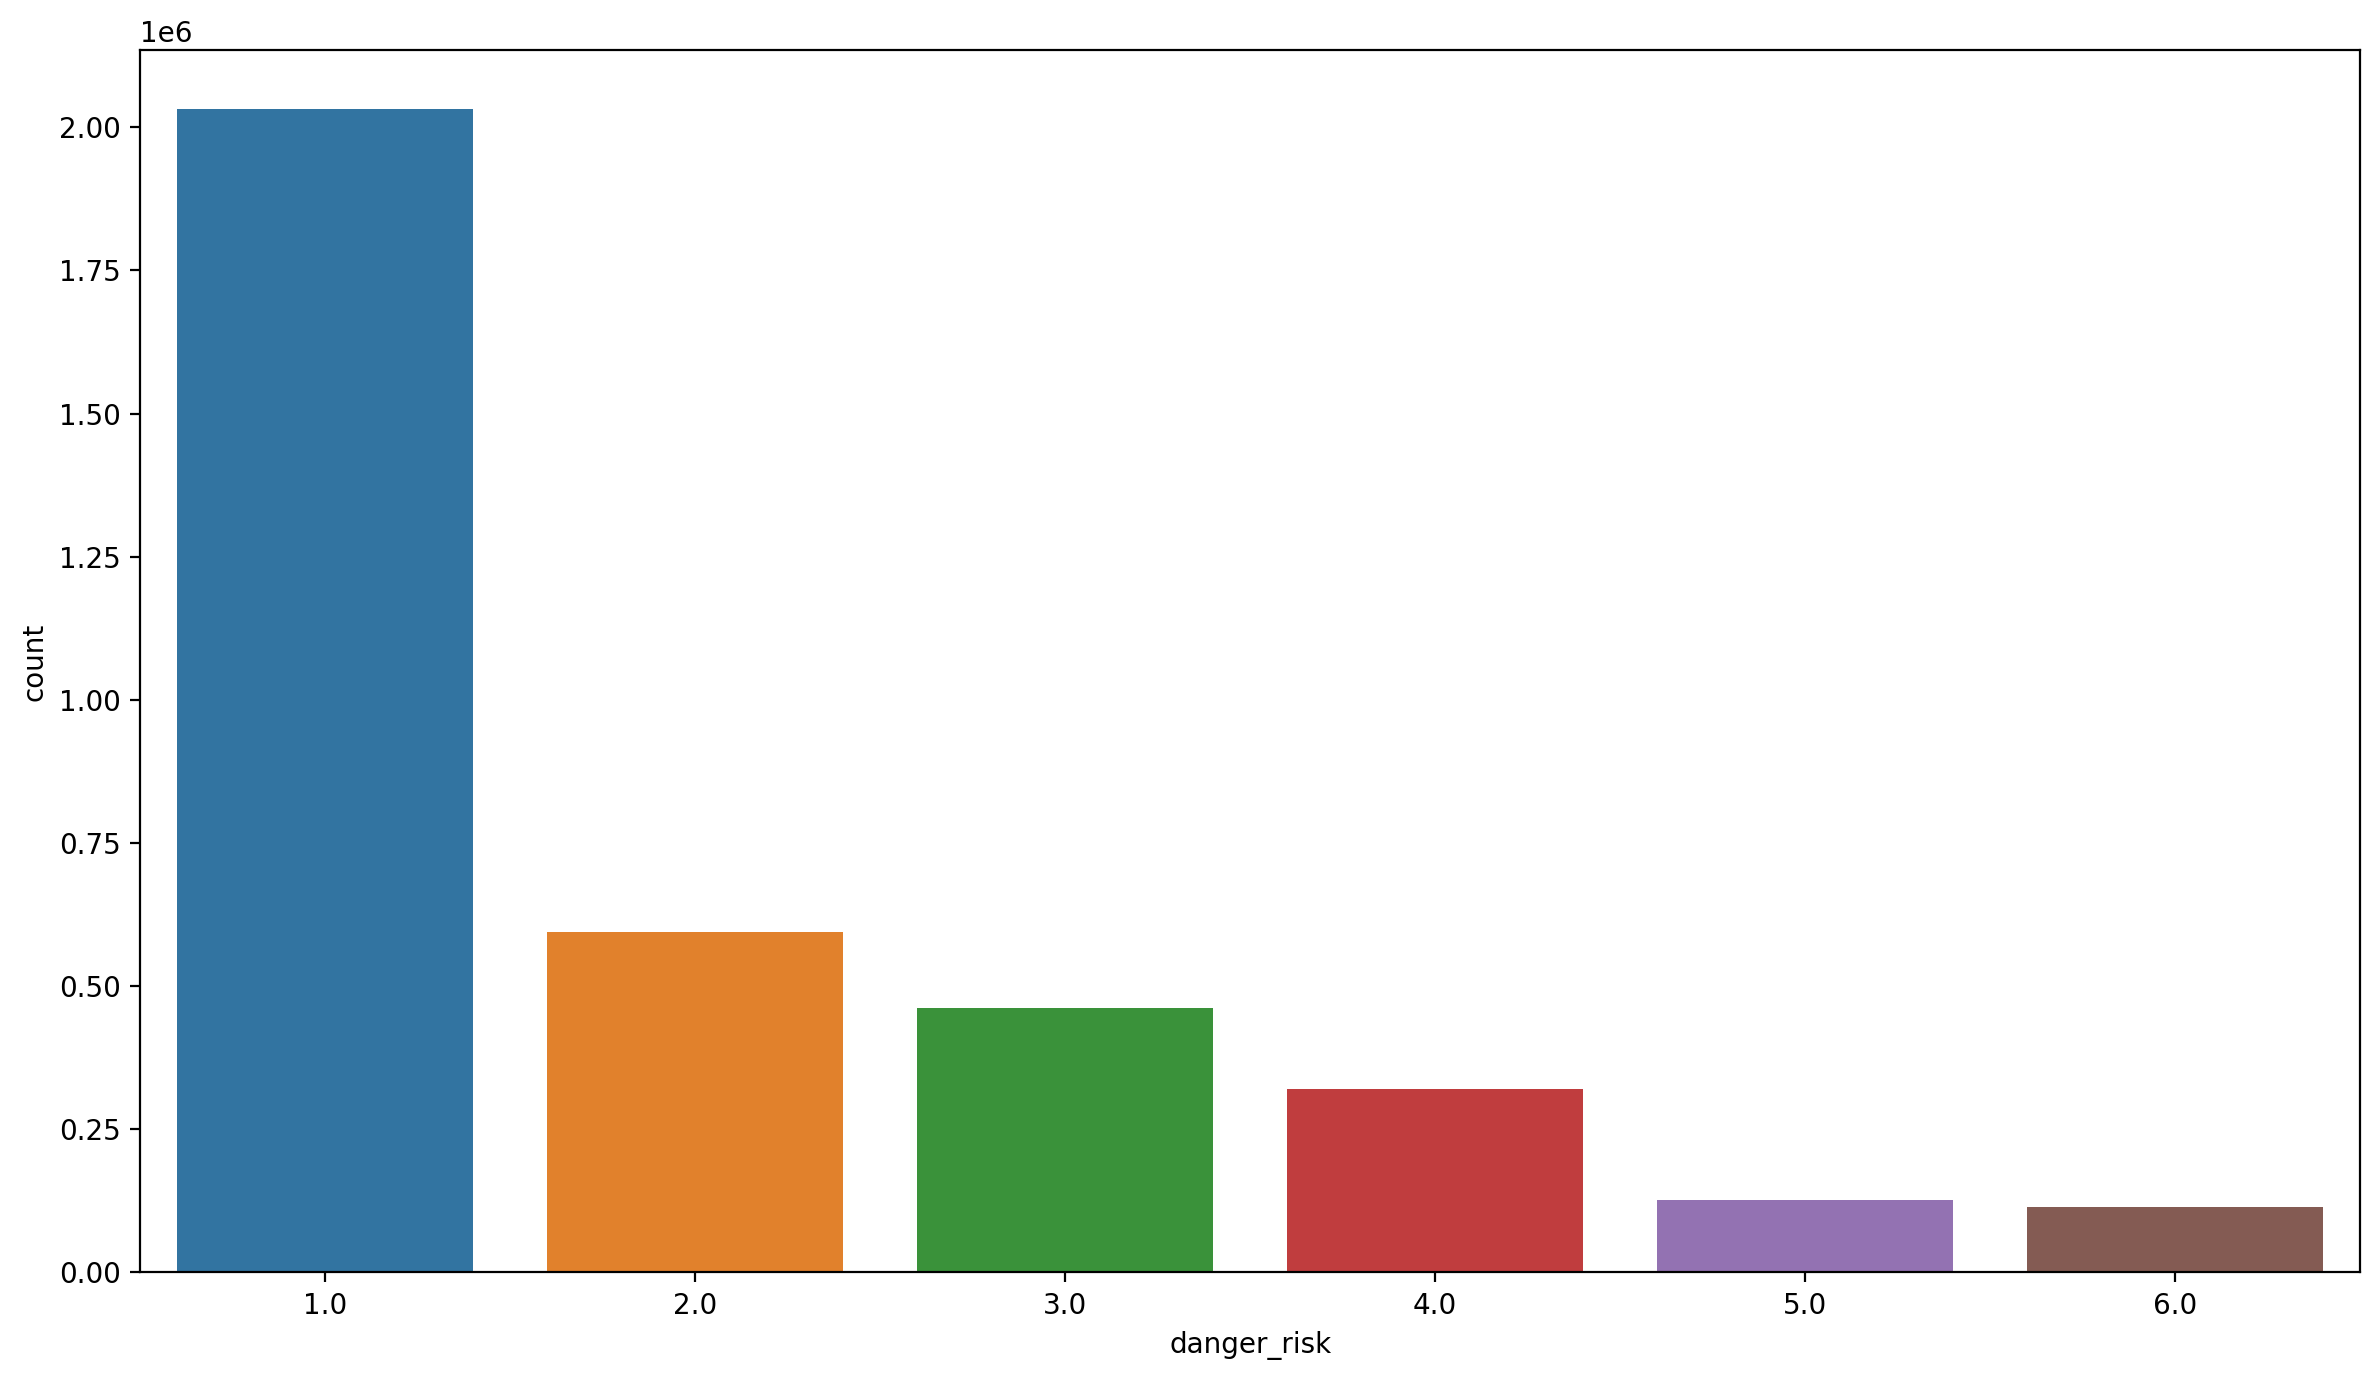

In [6]:
plt.figure(figsize=(12,7), dpi=200)
sns.countplot(data=df, x=df['danger_risk'].round())
plt.tight_layout();

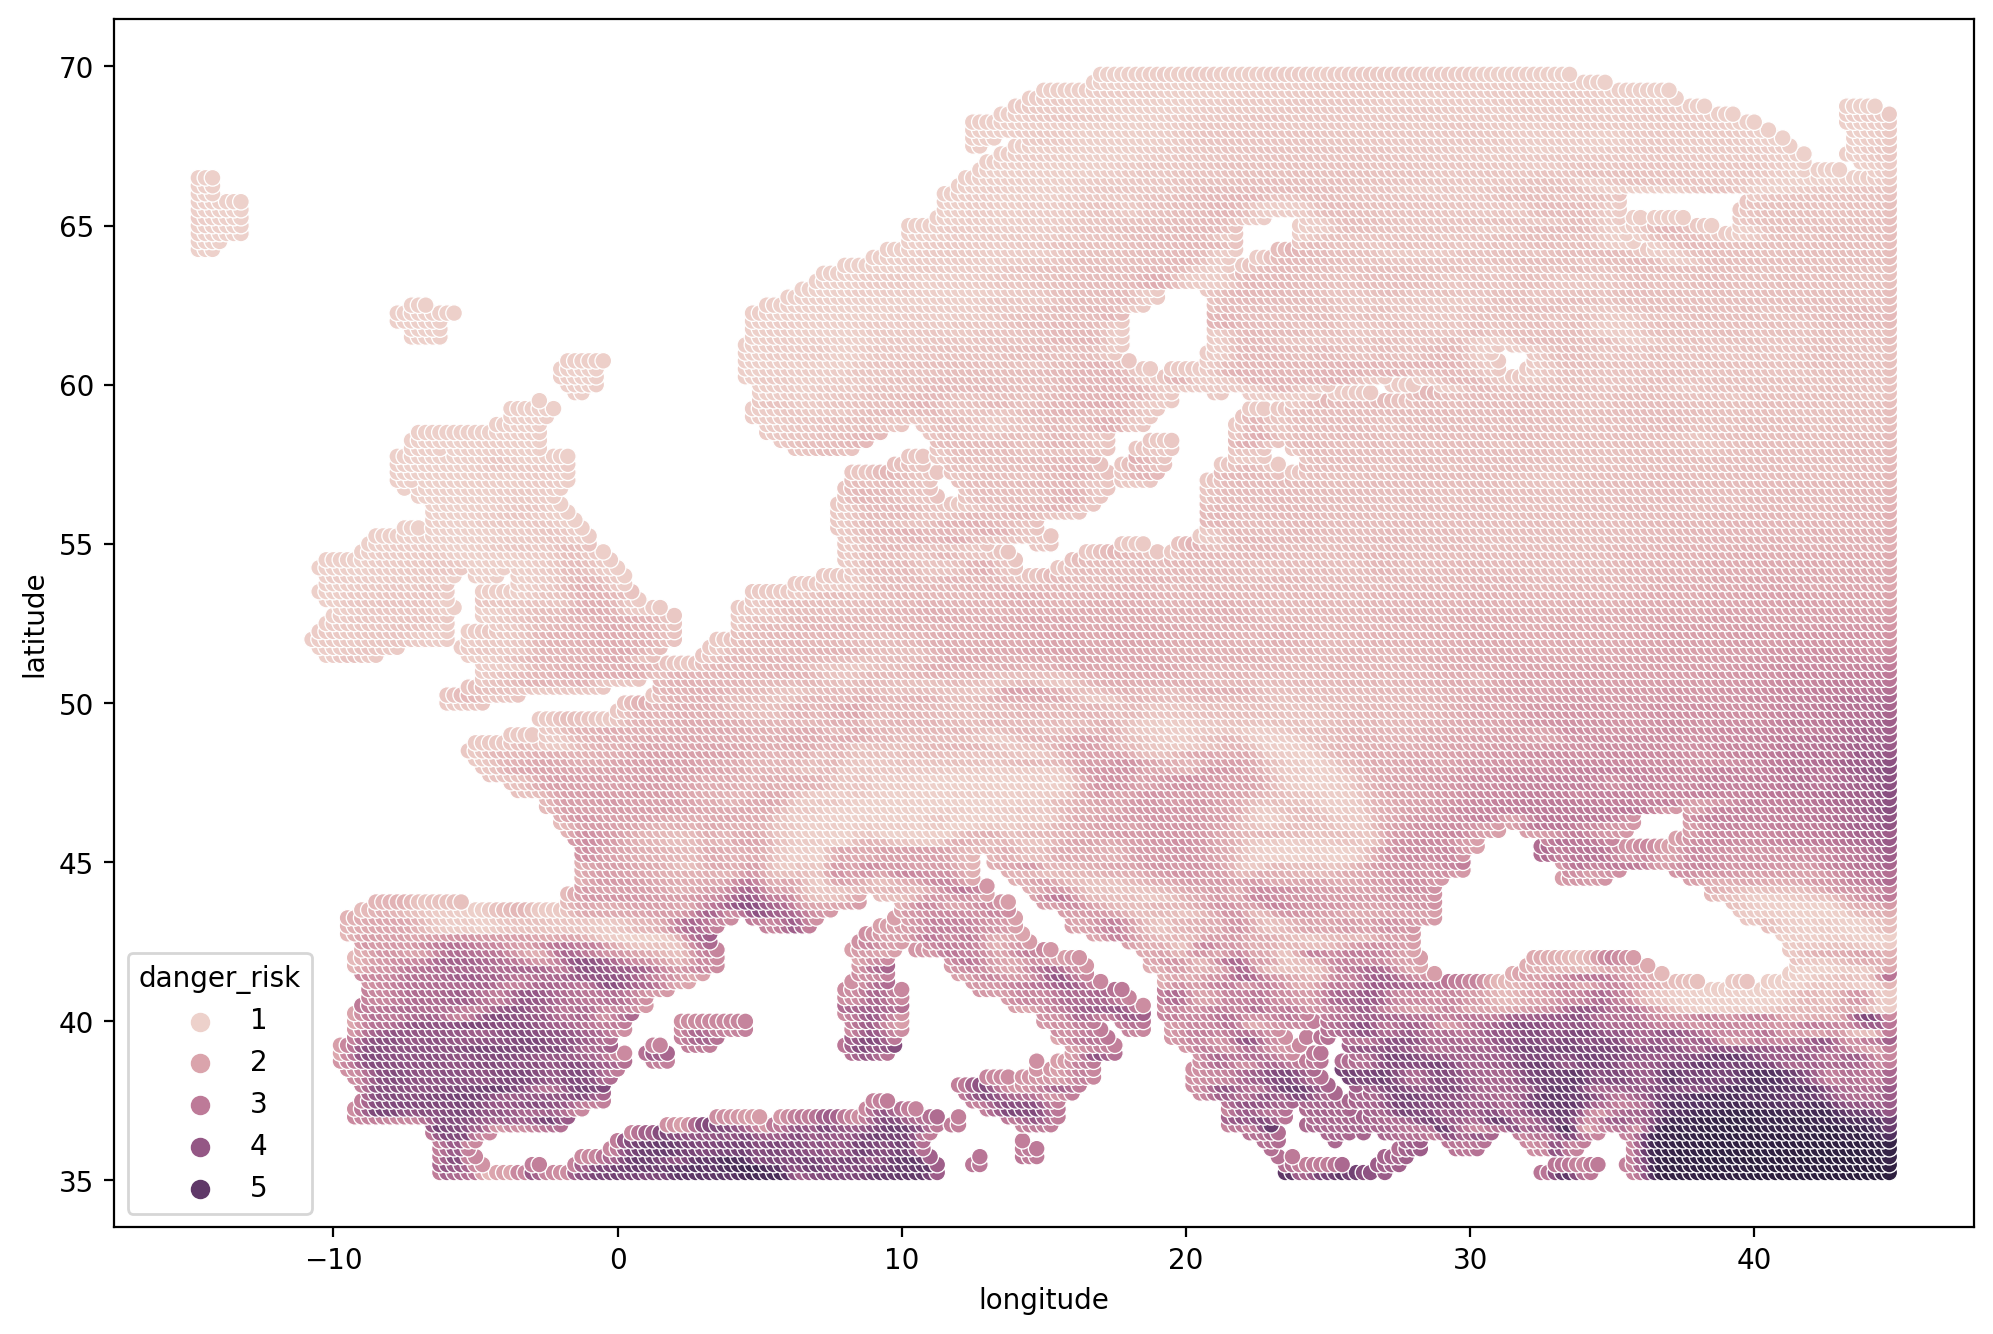

In [7]:
time_avg = df.groupby(['latitude','longitude']).mean()

plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=time_avg, x='longitude', y='latitude', hue='danger_risk');

Now we focus on the three features that describe the moisture content on the ground at different layers. It is clear the correlation between these three features, and their colleration with the danger risk. In this dataset all the features are positively correlate. High values correspond to an higher risk of dangerous wildfires.

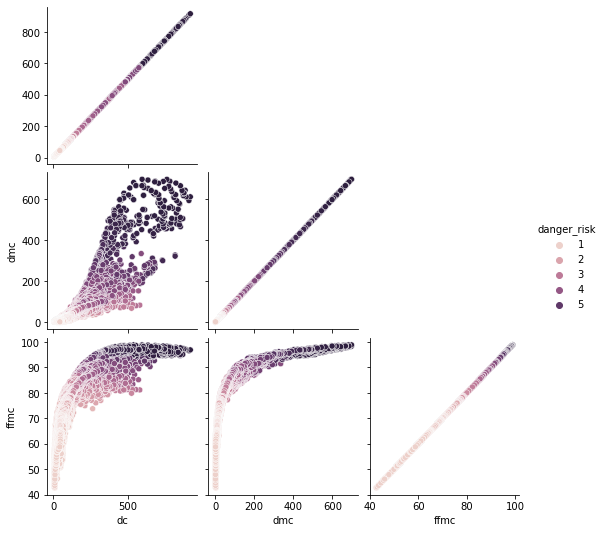

In [8]:
sns.pairplot(time_avg, x_vars=['dc','dmc','ffmc'], y_vars=['dc','dmc','ffmc'],
             hue='danger_risk', diag_kind=None, corner=True);

In this last part of the EDA we explore the time dependence of the dataset. We select the months of June, July, August and September; we want to study the differences between them.

The figure below shows the value of each feature rescaled on their maximum values. July, August and September are almost the same, with the exception of the Drought Code, Duff moisture code and KBDI, where July and June have lower values compared to August and September. 

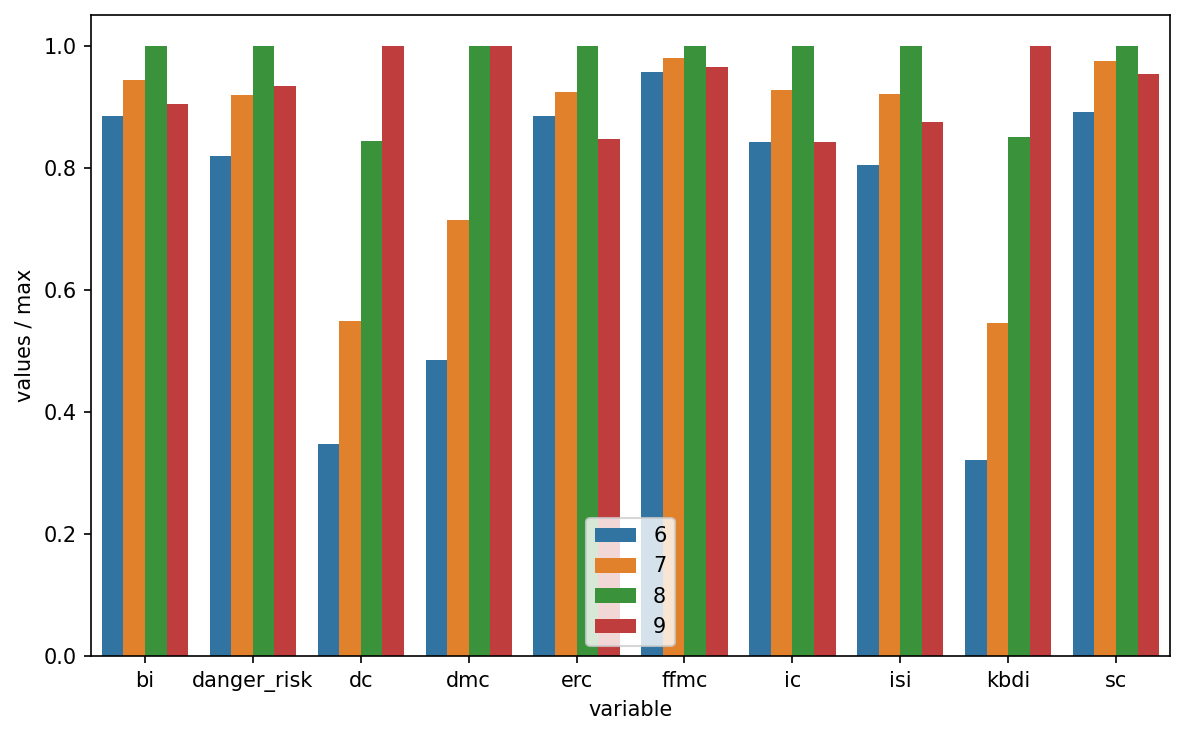

In [9]:
## Grouping by the month ##

df['month'] = df['time'].apply(lambda x: x.month)
monthly_avg = df.groupby('month').mean().drop(['latitude','longitude'], axis=1)

## Rescale on the max value of every feature ##

for feature in monthly_avg.columns:
    monthly_avg[feature] = monthly_avg[feature] / monthly_avg[feature].max()

df_tidy=pd.melt(monthly_avg.reset_index(),
                id_vars=['month'],value_vars=monthly_avg.columns.tolist(),
                value_name='values')

## Build the figure ##

plt.figure(figsize=(8,5), dpi=150)
sns.barplot(data=df_tidy,hue='month',x='variable',y='values')
plt.legend(loc='lower center')
plt.ylabel('values / max')
plt.tight_layout();

The last figure shows how every features (except for Fine fuel moisture code) is rising over the years, giving insights on the consequences of climate change. The features are grouped over the year, averaging per month, latitude and longitude; therefore, the data are rescaled on the value of the first year. The increasing trend suggests that the wildfire hazard are growing each summer ever more.

In the next section we build a clustering algorithm, combined with a supervised classification model, in order to observe in a simple and clear way how the climate change is boosting the probability of great wildfires, like we see this summer.

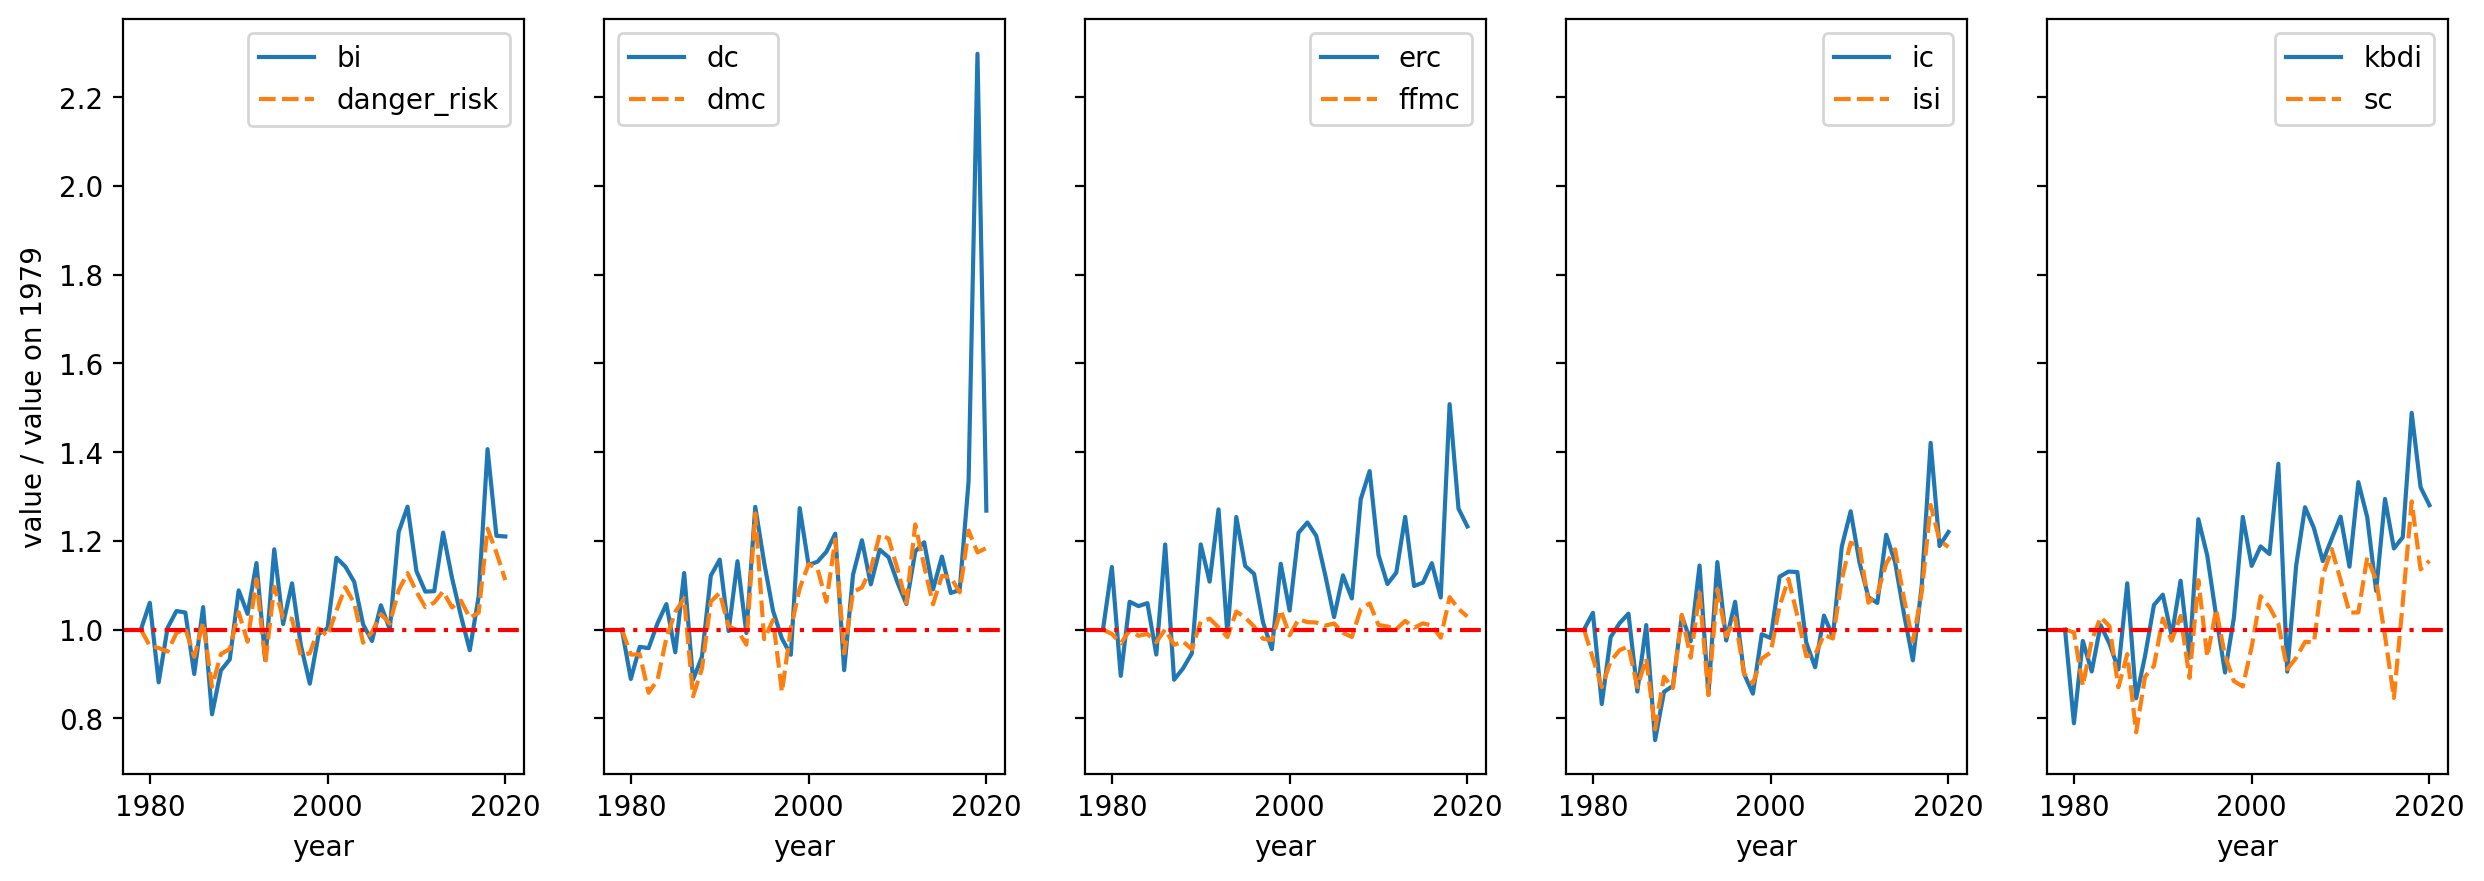

In [10]:
## Grouping by the year ##

df['year'] = df['time'].apply(lambda x: x.year)
year_avg = df.groupby('year').mean().drop(['latitude','longitude','month'], axis=1)

## Rescale on the value of the first year ##

for feature in year_avg.columns:
    year_avg[feature] = year_avg[feature] / year_avg.iloc[0][feature]
    
## Build the figure ##
    
fig, ax = plt.subplots(1,5, figsize=(15,5), dpi=200, sharey=True)

for i in range(5):
    sns.lineplot(ax=ax[i], data=year_avg[year_avg.columns[i*2:(i+1)*2]])
    ax[i].axhline(y=1.0, color='r', dashes=(5, 2, 1, 2))
    
ax[0].set_ylabel('value / value on 1979');